In [680]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [681]:
# Read in dataset
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [682]:
data['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

In [683]:
X, y = data.iloc[:, 5:], data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

In [684]:
X_train

,X5,X6
23,2,4
39,2,4
125,5,5
4,3,5
115,5,5
...,...,...
120,1,3
37,4,5
7,4,5
91,5,5


In [685]:
# Logistic Regression model initialization
model = LogisticRegression(
    penalty='l1',
    C=2.0,
    solver='saga',
    max_iter=10000
)

In [686]:
# model training
model.fit(X_train, y_train)

# prédictions
y_pred = model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7307692307692307


In [687]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6667
Recall: 0.9231
F1 Score: 0.7204


In [688]:
model.classes_

array([0, 1], dtype=int64)

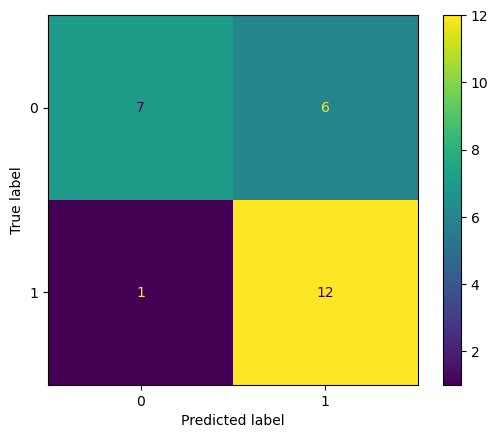

In [689]:
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt

# Assuming 'cm' is your calculated confusion matrix and 'class_names' are your class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()